#📌 1. Extracción (E - Extract)

##Extracción de datos

Cargar los datos directamente desde la API utilizando Python.

In [1]:
import requests
import pandas as pd

In [2]:
#url = 'TelecomX_Data.json'

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [3]:
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 2. Transformación (T - Transform)

##Conoce el conjunto de datos

Verificamos incoherencias

Explorar las columnas del dataset y verificar sus tipos de datos.

In [5]:
#Observamos que no hay valores nulos.
#En "account.Charges.Total" -> si son numéricos deben de ser tipo entero o float, al observar la tabla vemos que son valores de tipo float. Tenemos que convertir estos valores a float.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [6]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


Efectuar un diccionario para comprender mejor el significado de las variables

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

organizamos en un formato jerárquico, conteniendo la siguiente información:

1. **Identificación del Cliente**
* `'customerID'`: número de identificación único de cada cliente.


2. **Cancelación del servicio**
* `'Churn'`: si el cliente dejó o no la empresa. (`Yes` o `No`).


3. **Información del Cliente** (`'customer'`)
* `'gender'`: género (masculino y femenino). (`Male` o `Female`).
* `'SeniorCitizen'`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años. (0 = No, 1 = Sí).
* `'Partner'`: si el cliente tiene o no una pareja. (`Yes` o `No`).
* `'Dependents'`: si el cliente tiene o no dependientes. (`Yes` o `No`).
* `'tenure'`: meses de contrato del cliente. (en meses).


4. **Servicios de Telefonía** (`'phone'`)
* `'PhoneService'`: suscripción al servicio telefónico. (`Yes` o `No`).
* `'MultipleLines'`: suscripción a más de una línea telefónica. (`Yes` o `No` o `No phone service`).


5. **Servicios de Internet** (`'internet'`)
* `'InternetService'`: suscripción a un proveedor de internet. (`DSL`, `Fiber optic`, `No`).
* Servicios adicionales. (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`).


6. **Información de la Cuenta** (`'account'`)
* `'Contract'`: tipo de contrato. (`Month-to-month`, `One year`, `Two year`).
* `'PaperlessBilling'`: si el cliente prefiere recibir la factura en línea. (`Yes` o `No`).
* `'PaymentMethod'`: forma de pago. (`Bank transfer`, `Credit card`, `Electronic check`, `Mailed check`).
* `'Charges.Monthly'`: total de todos los servicios del cliente por mes.
* `'Charges.Total'`: total gastado por el cliente.

##Comprobación de incoherencias en los datos

Verificar si hay problemas en los datos que puedan afectar el análisis. Hay que prestar atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurar que los datos estén listos para las siguientes etapas.

Valores nulos

In [7]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


Valores vacíos o en blanco

In [8]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


Observamos en dónde se ubican los valores vacíos en la columna Churn

In [9]:
df[df['Churn'] == ""]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


Observamos en dónde se ubican los valores vacíos o en blanco en account.Charges.Total.

In [10]:
#account.Charges.Total ≈ account.Charges.Monthly * customer.tenure.
#Es posible que estén vacíos porque el campo tenure es 0 (por ser cliente nuevo).
#El resultado del cálculo es aproximado, se podría asumir que hay otras variaciones que no se han incluido en la data.
#Encontraremos valores problemáticos: vacíos (''), NaN, Valores mal formateados, no numérico o que hagan falta.

faltantes = df.loc[
    ~df['account.Charges.Total']
        .astype(str)
        .str.replace('.', '', 1)
        .str.isnumeric()
]

faltantes

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


Valores duplicados

In [11]:
print("Numero de duplicados", df.duplicated().sum())

Numero de duplicados 0


Valores únicos

In [12]:
for col in df.columns:
  print(f'{col}: {df[col].nunique()}')

customerID: 7267
Churn: 3
customer.gender: 2
customer.SeniorCitizen: 2
customer.Partner: 2
customer.Dependents: 2
customer.tenure: 73
phone.PhoneService: 2
phone.MultipleLines: 3
internet.InternetService: 3
internet.OnlineSecurity: 3
internet.OnlineBackup: 3
internet.DeviceProtection: 3
internet.TechSupport: 3
internet.StreamingTV: 3
internet.StreamingMovies: 3
account.Contract: 3
account.PaperlessBilling: 2
account.PaymentMethod: 4
account.Charges.Monthly: 1585
account.Charges.Total: 6531


In [13]:
#Observamos valores vacíos en la columna Churn.

for col in df.columns:
  print(f" Valores unicos en la columna'{col}: {df[col].nunique()}'")

  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' * 50)

 Valores unicos en la columna'customerID: 7267'
 Valores unicos en la columna'Churn: 3'
['No' 'Yes' '']
--------------------------------------------------
 Valores unicos en la columna'customer.gender: 2'
['Female' 'Male']
--------------------------------------------------
 Valores unicos en la columna'customer.SeniorCitizen: 2'
[0 1]
--------------------------------------------------
 Valores unicos en la columna'customer.Partner: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'customer.Dependents: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'customer.tenure: 73'
 Valores unicos en la columna'phone.PhoneService: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'phone.MultipleLines: 3'
['No' 'Yes' 'No phone service']
--------------------------------------------------
 Valores unicos en la columna'internet.InternetService: 3'
['DSL' 'Fiber o

##Manejo de inconsistencias

Al identificar las inconsistencias, aplicamos las correcciones necesarias. Ajustamos los datos para asegurarnos de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

Cambiando account.Charges.Total para float

In [14]:
df['account.Charges.Total'] = df['account.Charges.Total'].apply(pd.to_numeric, errors='coerce')
print(df['account.Charges.Total'].dtype)

float64


Verificamos

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [16]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


En account.Charges.Total -> Los valores vacios pasan a ser NaN

In [17]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [18]:
df[df['account.Charges.Total'].isna()]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


Eliminación de valores vacios en la columna Churn

In [19]:
#7267-224=7043

df = df[df['Churn'].str.strip() != '']
print("Número de filas despues de eliminar los vacios en 'Churn':", len(df))

Número de filas despues de eliminar los vacios en 'Churn': 7043


Verificamos

In [20]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [21]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [22]:
#7267-224=7043

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

Eliminación de valores NaN en account.Charges.Total

In [23]:
df = df.dropna(subset=['account.Charges.Total'])

Veificamos

In [24]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


Verificamos como se ha actualizado la información

In [25]:
#7043-11=7032.
#224 "valores vacíos" + 11 "valores nulos" + 7032 "filas sin incoherencias" = 7267.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

Verificamos como se ha actualizado los valores únicos

In [26]:
for col in df.columns:
  print(f'{col}: {df[col].nunique()}')

customerID: 7032
Churn: 2
customer.gender: 2
customer.SeniorCitizen: 2
customer.Partner: 2
customer.Dependents: 2
customer.tenure: 72
phone.PhoneService: 2
phone.MultipleLines: 3
internet.InternetService: 3
internet.OnlineSecurity: 3
internet.OnlineBackup: 3
internet.DeviceProtection: 3
internet.TechSupport: 3
internet.StreamingTV: 3
internet.StreamingMovies: 3
account.Contract: 3
account.PaperlessBilling: 2
account.PaymentMethod: 4
account.Charges.Monthly: 1584
account.Charges.Total: 6530


In [27]:
#Observamos que ya no aparecen valores vacíos en la columna Churn.

for col in df.columns:
  print(f" Valores unicos en la columna'{col}: {df[col].nunique()}'")

  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' * 50)

 Valores unicos en la columna'customerID: 7032'
 Valores unicos en la columna'Churn: 2'
['No' 'Yes']
--------------------------------------------------
 Valores unicos en la columna'customer.gender: 2'
['Female' 'Male']
--------------------------------------------------
 Valores unicos en la columna'customer.SeniorCitizen: 2'
[0 1]
--------------------------------------------------
 Valores unicos en la columna'customer.Partner: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'customer.Dependents: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'customer.tenure: 72'
 Valores unicos en la columna'phone.PhoneService: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'phone.MultipleLines: 3'
['No' 'Yes' 'No phone service']
--------------------------------------------------
 Valores unicos en la columna'internet.InternetService: 3'
['DSL' 'Fiber opti

##Columna de cuentas diarias

Crea la columna "cuentas_diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo

In [28]:
df['cuentas_diarias'] = df['account.Charges.Monthly'] / 30
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


##Estandarización y transformación de datos

Traduce o renombra columnas y datos para que la información sea más accesible y fácil de entender , puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones.

La estandarización y transformación de datos es altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

In [29]:
#Diccionario con los nuevos nombres de las columnas.

columnas = {
    'customerID': 'id',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'tiene +60',
    'customer.Partner': 'posee_pareja',
    'customer.Dependents': 'posee_dependientes',
    'customer.tenure': 'tiempo_contrato',
    'phone.PhoneService': 'servicio_telefono',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'valor_mensual',
    'account.Charges.Total': 'total_cobrado'
}
df = df.rename(columns= columnas)
df.head()



,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [30]:
df['genero'] = df['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df['multiples_lineas'] = df['multiples_lineas'].replace({'No phone service': 'Sin servicio de teléfono'})
df['tipo_internet'] = df['tipo_internet'].replace({'No': '0', 'Fiber optic': 'Fibra óptica'})
df['seguridad_online'] = df['seguridad_online'].replace({'No internet service': 'Sin servicio de internet'})
df['backup_online'] = df['backup_online'].replace({'No internet service': 'Sin servicio de internet'})
df['proteccion_dispositivo'] = df['proteccion_dispositivo'].replace({'No internet service': 'Sin servicio de internet'})
df['soporte_tecnico'] = df['soporte_tecnico'].replace({'No internet service': 'Sin servicio de internet'})
df['streaming_tv'] = df['streaming_tv'].replace({'No internet service': 'Sin servicio de internet'})
df['streaming_peliculas'] = df['streaming_peliculas'].replace({'No internet service': 'Sin servicio de internet'})
df['tipo_contrato'] = df['tipo_contrato'].replace({'One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bienal'})
df.head()

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,Anual,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Mensual,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Masculino,0,No,No,4,Yes,No,Fibra óptica,...,Yes,No,No,No,Mensual,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Masculino,1,Yes,No,13,Yes,No,Fibra óptica,...,Yes,No,Yes,Yes,Mensual,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Femenino,1,Yes,No,3,Yes,No,Fibra óptica,...,No,Yes,Yes,No,Mensual,Yes,Mailed check,83.9,267.40,2.796667


In [31]:
df['metodo_pago'] = df['metodo_pago'].replace({
    'Mailed check': 'Cheque enviado por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)'
})
df.head()

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,Anual,Yes,Cheque enviado por correo,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Mensual,No,Cheque enviado por correo,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Masculino,0,No,No,4,Yes,No,Fibra óptica,...,Yes,No,No,No,Mensual,Yes,Cheque electrónico,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Masculino,1,Yes,No,13,Yes,No,Fibra óptica,...,Yes,No,Yes,Yes,Mensual,Yes,Cheque electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Femenino,1,Yes,No,3,Yes,No,Fibra óptica,...,No,Yes,Yes,No,Mensual,Yes,Cheque enviado por correo,83.9,267.40,2.796667


In [32]:
binarios = [
    'Churn',
    'posee_pareja',
    'posee_dependientes',
    'servicio_telefono',
    'multiples_lineas',
    'seguridad_online',
    'backup_online',
    'proteccion_dispositivo',
    'soporte_tecnico',
    'streaming_tv',
    'streaming_peliculas',
    'factura_digital'
]

for col in binarios:
    df[col] = df[col].map({
        'Yes': 1,
        'No': 0
        })
df.head()

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuentas_diarias
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,Anual,1,Cheque enviado por correo,65.6,593.30,2.186667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Mensual,0,Cheque enviado por correo,59.9,542.40,1.996667
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0.0,Fibra óptica,...,1.0,0.0,0.0,0.0,Mensual,1,Cheque electrónico,73.9,280.85,2.463333
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0.0,Fibra óptica,...,1.0,0.0,1.0,1.0,Mensual,1,Cheque electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0.0,Fibra óptica,...,0.0,1.0,1.0,0.0,Mensual,1,Cheque enviado por correo,83.9,267.40,2.796667


#📊 3. Carga y análisis (L - Load & Analysis)

##Análisis Descriptivo

Realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [33]:
#media -> mean.
#mediana -> 50%.
#desviación estándar -> std.

describe = df.describe()

#Convertimos a object para evitar warnings
formatted = describe.astype(object)

#Columnas con porcentajes
binarias = [
    'Churn', 'tiene +60', 'posee_pareja', 'posee_dependientes',
    'servicio_telefono', 'multiples_lineas', 'tipo_internet', 'seguridad_online',
    'backup_online', 'proteccion_dispositivo', 'soporte_tecnico',
    'streaming_tv', 'streaming_peliculas', 'factura_digital'
]

for col in binarias:
    if col in describe.columns:
        for idx in formatted.index:
            if idx == 'count':
                formatted.loc[idx, col] = f"{int(describe.loc[idx, col])}"
            else:
                formatted.loc[idx, col] = f"{describe.loc[idx, col]*100:.1f}%"

#Columnas monetarias
monetarias = ['valor_mensual', 'total_cobrado', 'cuentas_diarias']
for col in monetarias:
    if col in describe.columns:
        for idx in formatted.index:
            if idx == 'count':
                formatted.loc[idx, col] = f"{int(describe.loc[idx, col])}"
            else:
                formatted.loc[idx, col] = f"${describe.loc[idx, col]:,.1f}"

#tiempo_contrato
contrato = 'tiempo_contrato'
if contrato in describe.columns:
    for idx in formatted.index:
        if idx == 'count':
            formatted.loc[idx, contrato] = f"{int(describe.loc[idx, contrato])}"
        else:
            formatted.loc[idx, contrato] = f"{describe.loc[idx, contrato]:.1f}"

#Mostrar tabla
display(formatted)

#Notas interpretativas automáticas
print("\nNotas interpretativas:")
print(f"- churn: {describe.loc['mean','Churn']*100:.1f}% de clientes cancelaron.")
print(f"- tiene +60: {describe.loc['mean','tiene +60']*100:.1f}% son adultos mayores.")
print(f"- posee_pareja: {describe.loc['mean','posee_pareja']*100:.1f}% tienen pareja.")
print(f"- posee_dependientes: {describe.loc['mean','posee_dependientes']*100:.1f}% tienen dependientes.")
print(f"- tiempo_contrato: mediana = {describe.loc['50%','tiempo_contrato']:.1f} meses, máximo = {describe.loc['max','tiempo_contrato']:.1f} meses.")
print(f"- valor mensual: media = ${describe.loc['mean','valor_mensual']:.1f}, mediana = ${describe.loc['50%','valor_mensual']:.1f}.")
print(f"- total cobrado: media = ${describe.loc['mean','total_cobrado']:.1f}, mediana = ${describe.loc['50%','total_cobrado']:.1f}, máximo = ${describe.loc['max','total_cobrado']:.1f}.")
print(f"- cuentas diarias: media = ${describe.loc['mean','cuentas_diarias']:.1f}, mediana = ${describe.loc['50%','cuentas_diarias']:.1f}.")

,Churn,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,seguridad_online,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,factura_digital,valor_mensual,total_cobrado,cuentas_diarias
count,7032,7032,7032,7032,7032,7032,6352,5512,5512,5512,5512,5512,5512,7032,7032,7032,7032
mean,26.6%,16.2%,48.3%,29.8%,32.4,90.3%,46.7%,36.6%,44.0%,43.9%,37.0%,49.0%,49.5%,59.3%,$64.8,"$2,283.3",$2.2
std,44.2%,36.9%,50.0%,45.8%,24.5,29.6%,49.9%,48.2%,49.6%,49.6%,48.3%,50.0%,50.0%,49.1%,$30.1,"$2,266.8",$1.0
min,0.0%,0.0%,0.0%,0.0%,1.0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,$18.2,$18.8,$0.6
25%,0.0%,0.0%,0.0%,0.0%,9.0,100.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,$35.6,$401.4,$1.2
50%,0.0%,0.0%,0.0%,0.0%,29.0,100.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,100.0%,$70.3,"$1,397.5",$2.3
75%,100.0%,0.0%,100.0%,100.0%,55.0,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,$89.9,"$3,794.7",$3.0
max,100.0%,100.0%,100.0%,100.0%,72.0,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,$118.8,"$8,684.8",$4.0



Notas interpretativas:
- churn: 26.6% de clientes cancelaron.
- tiene +60: 16.2% son adultos mayores.
- posee_pareja: 48.3% tienen pareja.
- posee_dependientes: 29.8% tienen dependientes.
- tiempo_contrato: mediana = 29.0 meses, máximo = 72.0 meses.
- valor mensual: media = $64.8, mediana = $70.3.
- total cobrado: media = $2283.3, mediana = $1397.5, máximo = $8684.8.
- cuentas diarias: media = $2.2, mediana = $2.3.


Observaciones

-Hay una desviación estandar de 44.2%, hay una variación considerable entre los clientes que se quedaron y no se quedaron.

-Hay una desviación estandar de 36.9% para los mayores de 60 años, la distribución de las personas mayores es bastante desigual.

-El promedio de tiempo_contrato es de 32.4 meses, con una desviación estandar de 24.5 meses. Esto indica que, aunque la mayoría de los clientes tienen una duración de contrato inferior al promedio, el rango es bastante amplio, abarcando clientes con contratos tanto cortos como largos.

-La variables multiples_lineas tiene un promedio de 46.7%, lo que indica que casi la midad de los clientes usan multiples_lineas.

-El uso promedio de los servicios como streaming_tv y 	streaming_peliculas son considerablemente altos, están entre el 49% y 49.5%, esto quiere decir que los clientes tienden a utilizar más los servicios de transmisión.

##Distribución de evasión

El objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [34]:
import matplotlib.pyplot as plt

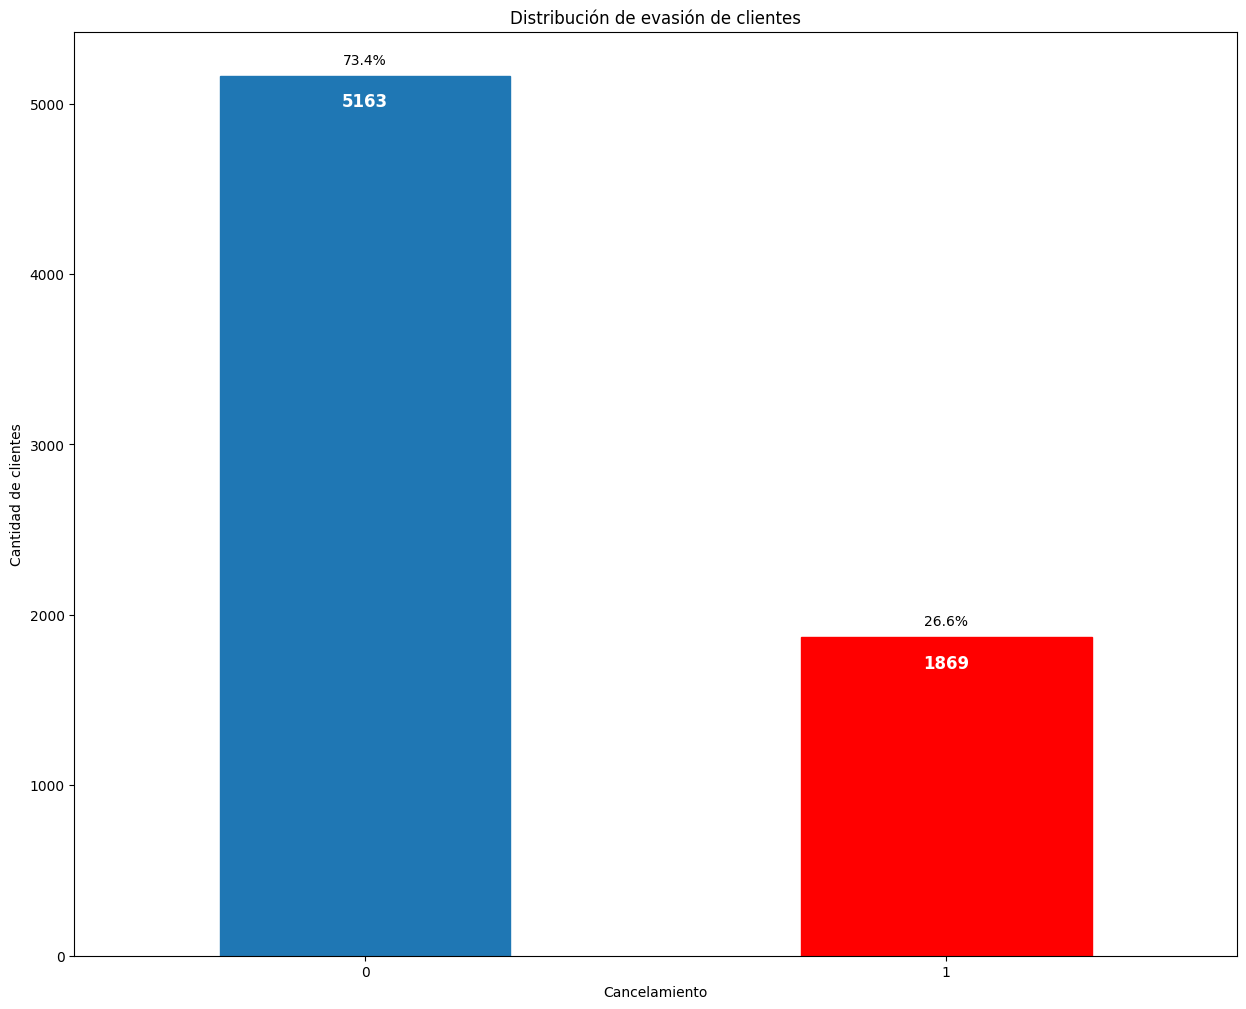

In [35]:
plt.figure(figsize=(15, 12))

churn_counts = df['Churn'].value_counts()
churn_percentages = (churn_counts / len(df)) * 100

ax = churn_counts.plot(kind='bar')

#Colores personalizados.
colores = ['#1f77b4', 'red']  #0 , 1.
for barra, color in zip(ax.patches, colores):
    barra.set_color(color)

plt.title('Distribución de evasión de clientes')
plt.xlabel('Cancelamiento')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)

for i, percentage in enumerate(churn_percentages):
    ax.text(
        i,
        churn_counts.iloc[i] + 50,
        f'{percentage:.1f}%',
        ha='center',
        va='bottom'
    )
    ax.text(
        i,
        churn_counts.iloc[i] - 100,
        str(churn_counts.iloc[i]),
        ha='center',
        va='top',
        color='white',
        fontsize=12,
        fontweight='bold'
    )

plt.show()

Observaciones

-Hay una evasión general de clientes del 26.6%

-Cuando observamos una tasa del 25% o más en cancelaciones, la empresa debería tomar medidas para generar soluciones a este problema.

##Recuento de evasión por variables categóricas

Exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

Tasas de abandono por varibles categóricas

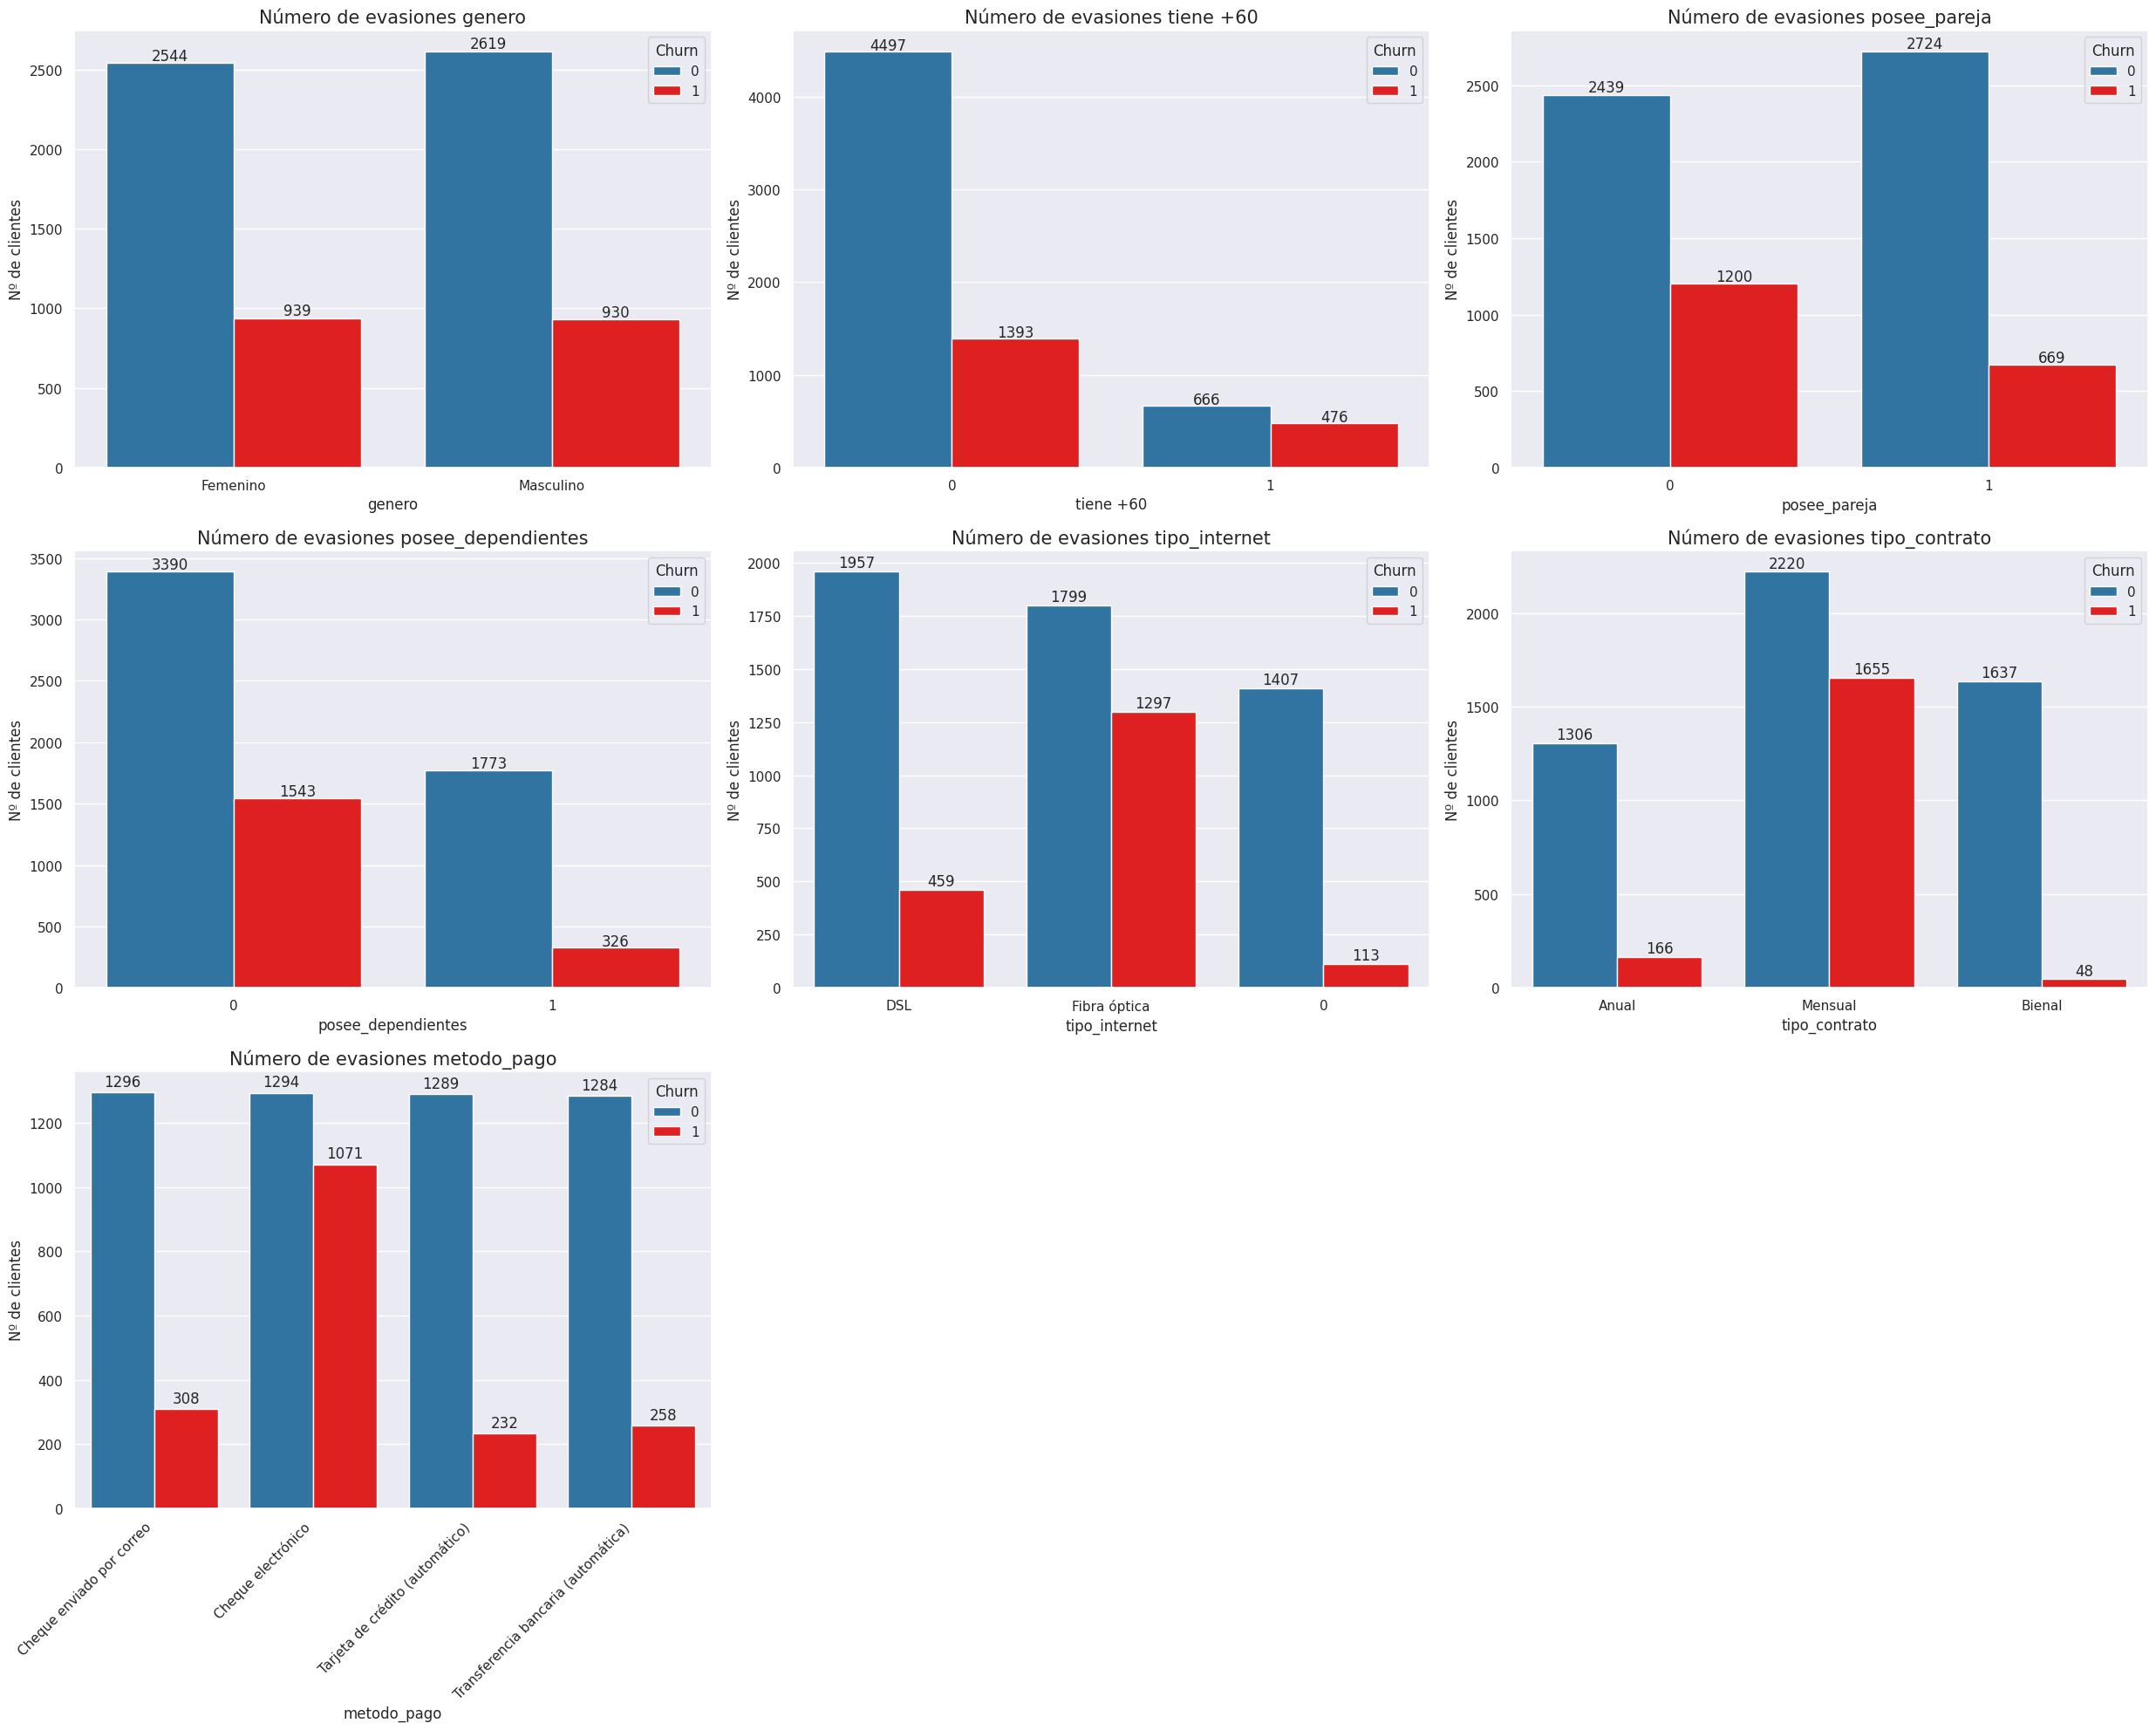

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

variables_categoricas = ['genero', 'tiene +60', 'posee_pareja',
                        'posee_dependientes', 'tipo_internet',
                         'tipo_contrato', 'metodo_pago',]

lista_variables_categoricas = list(enumerate(variables_categoricas))

sns.set(rc = {'figure.figsize':(25,20)})

for i in lista_variables_categoricas:

    plt.subplot(3, 3,  i[0]+1)
    ax = sns.countplot(data = df,
                    x = i[1],
                    hue = 'Churn',
                    palette = {0: '#1f77b4', 1: 'red'},
                    )

    ax.set_title(f'Número de evasiones {i[1]}', fontsize = 15) #Agregar un título y aumentar el tamaño de fuente.
    ax.set_ylabel('Nº de clientes', fontsize = 12) #Cambiar el título del eje Y y aumentar el tamaño de la fuente.
    ax.set_xlabel(i[1], fontsize = 12) #Cambiar el título del eje X y aumentar el tamaño de la fuente.

    #Cambiar rotación en el eje X sólo para la gráfica de metodo_pago
    if i[1] == 'metodo_pago':
        plt.xticks(rotation=45, ha='right')

    #Agregar etiqueta de datos para el Nº de clientes.
    for p in ax.patches:
        height = p.get_height()
        #Se agrega validación para no imprimir etiquetas en valores nulos o cero
        if height > 0:
            ax.text(p.get_x()+p.get_width()/2.,
            height + 20,
            '{:1.0f}'.format(height),#Se ajusta el formato para evitar decimales innecesarios
            ha='center',
            size = 12)

plt.tight_layout() #Ajustar el espacio entre gráficas
plt.show()

Observaciones

-Los generos masculino y feremino presentan relativamente casi los mismos registros de cancelaciones

-Los clientes que presentan mayor evasión son los menores de 60 años.

-Los clientes que no tienen pareja presentan más registros de cancelaciones en comparación de los clientes que si tienen pareja.

-Los clientes que no poseen dependientes presentan más registros de cancelaciones en comparación de los clientes que si poseen dependientes.

-Los clientes que tienen internet de fibra óptica presentan un alto registro de cancelaciones.

-Los clientes que tienen contratos mensuales presentan un alto registro de cancelaciones.

-El metodo de pago efectuado con cheque electrónico presenta un alto registro de cancelaciones.

Tasas de abandono por servicios

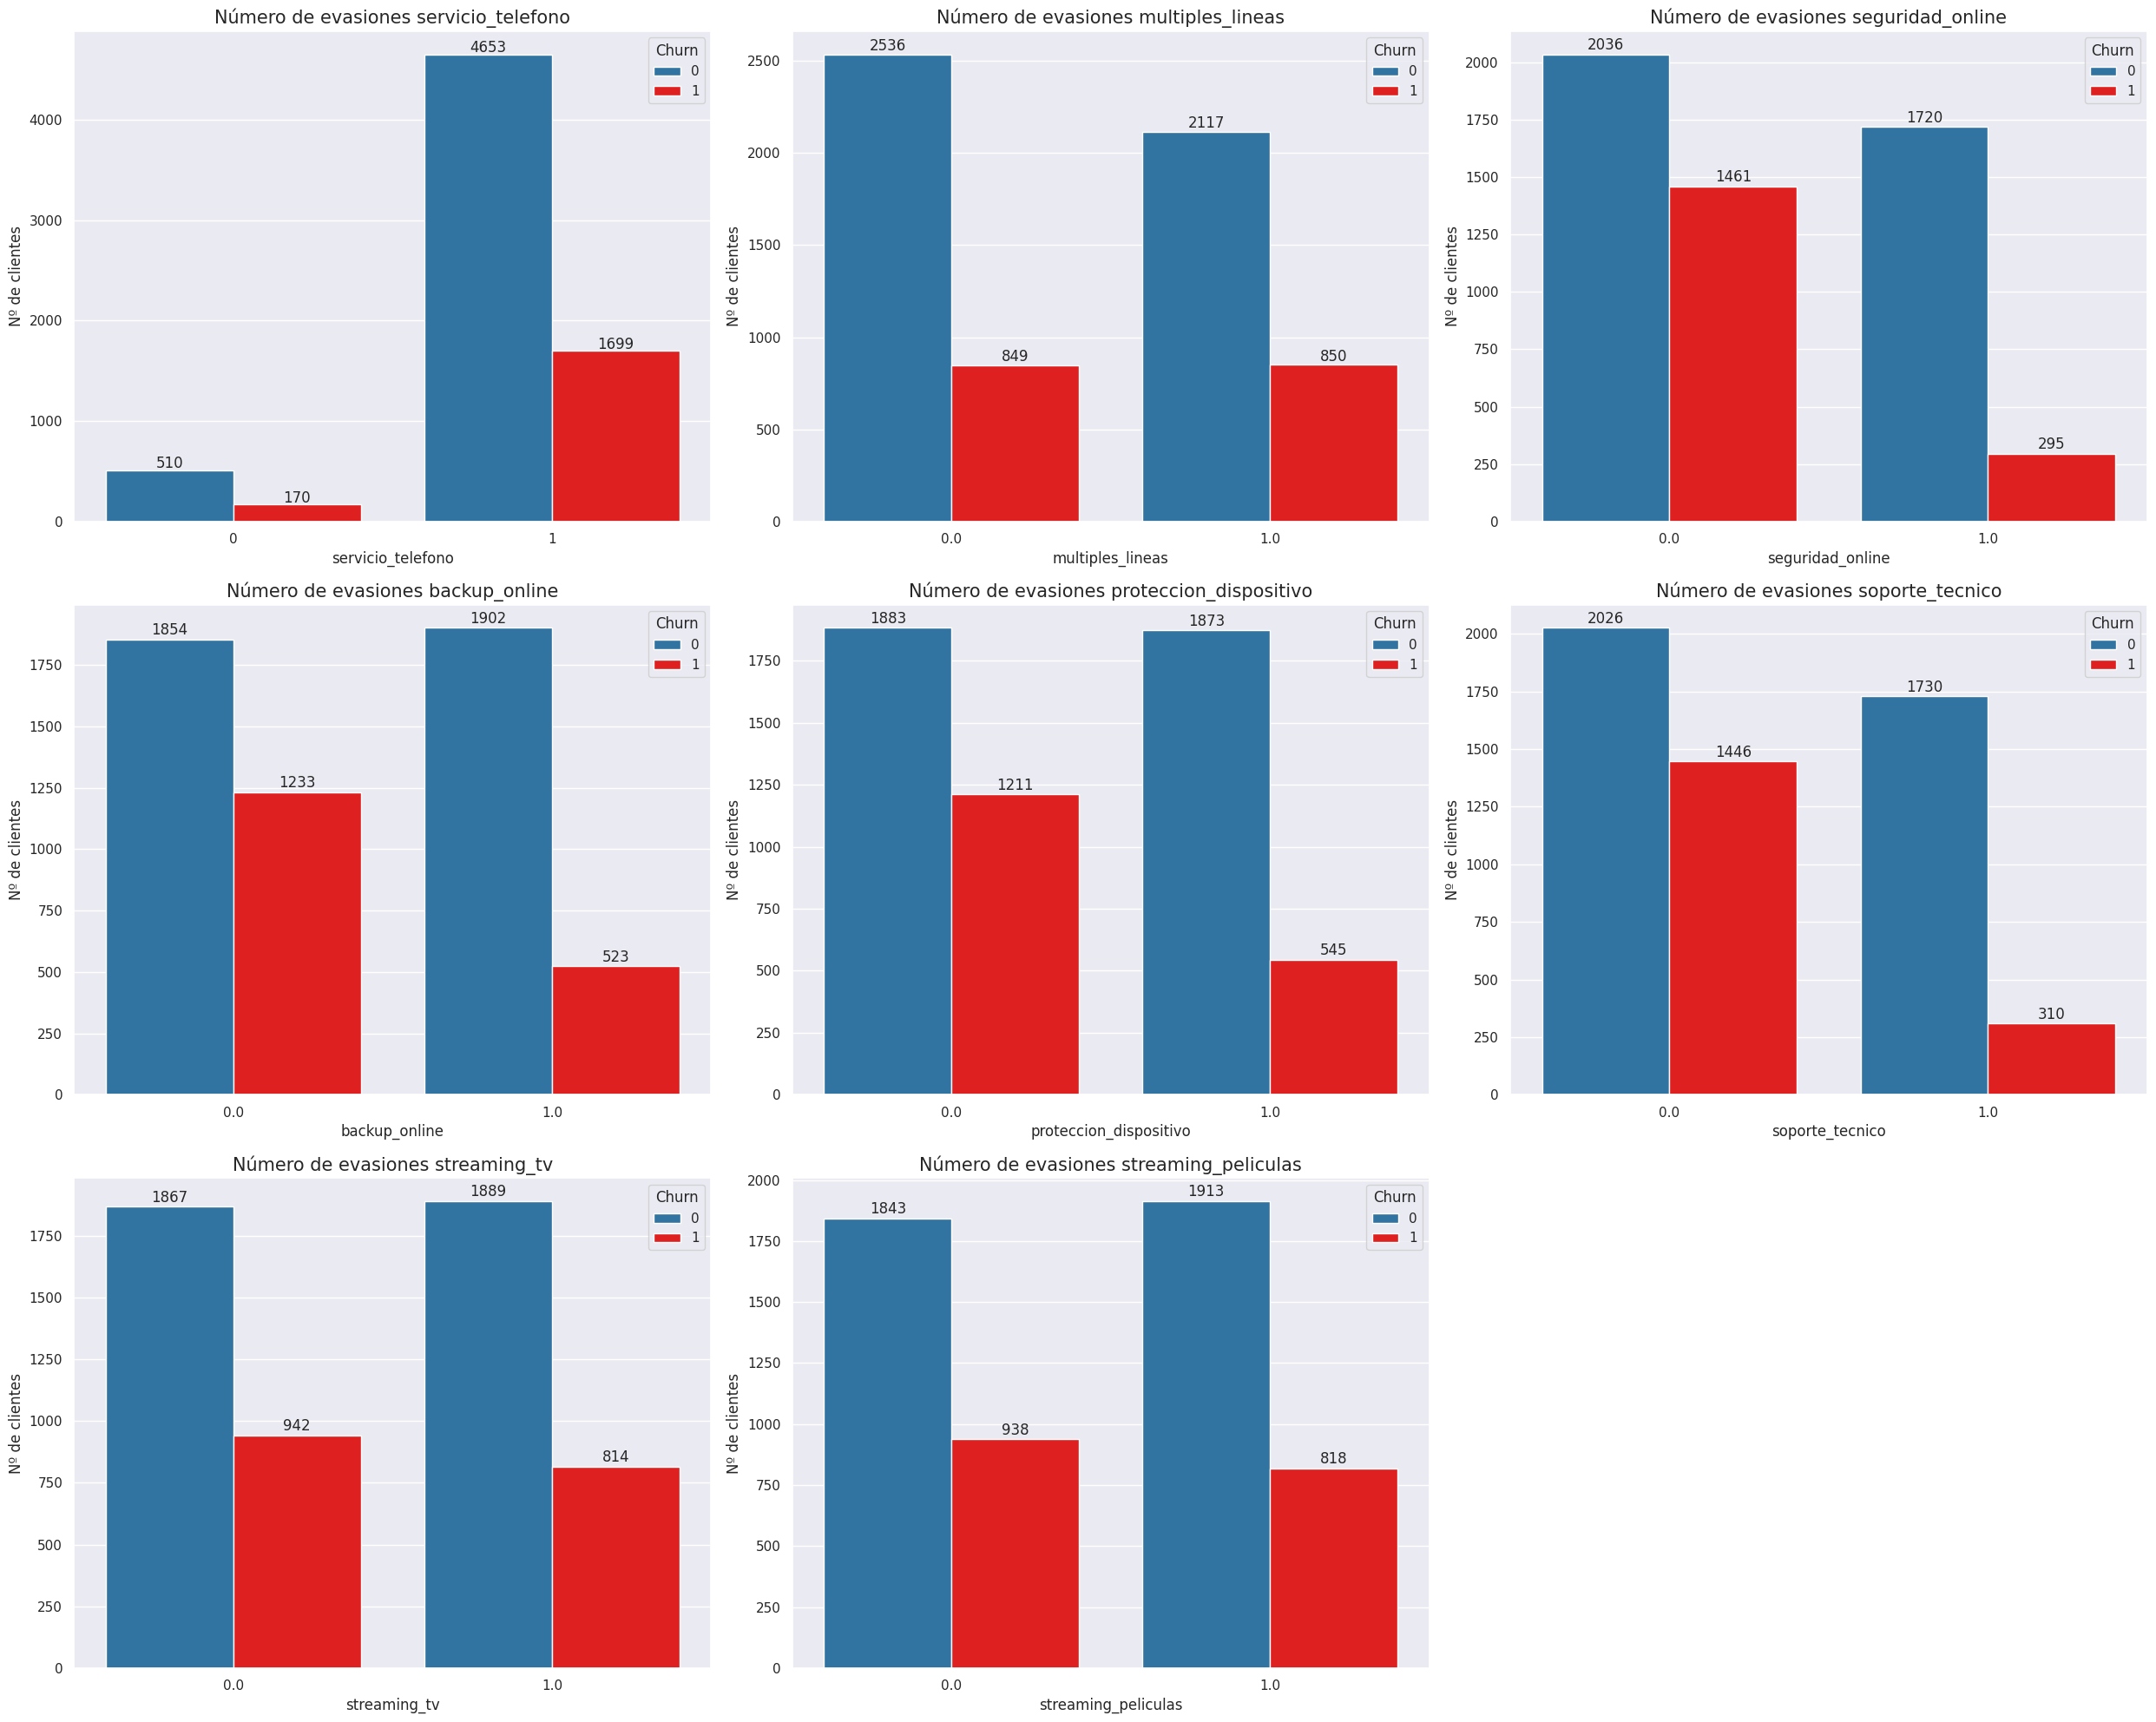

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

variables_categoricas = ['servicio_telefono', 'multiples_lineas', 'seguridad_online',
                        'backup_online', 'proteccion_dispositivo',
                         'soporte_tecnico', 'streaming_tv', 'streaming_peliculas',]

lista_variables_categoricas = list(enumerate(variables_categoricas))

sns.set(rc = {'figure.figsize':(25,20)})

for i in lista_variables_categoricas:

    plt.subplot(3, 3,  i[0]+1)
    ax = sns.countplot(data = df,
                    x = i[1],
                    hue = 'Churn',
                    palette = {0: '#1f77b4', 1: 'red'},
                    )

    ax.set_title(f'Número de evasiones {i[1]}', fontsize = 15) #Agregar un título y aumentar el tamaño de fuente.
    ax.set_ylabel('Nº de clientes', fontsize = 12) #Cambiar el título del eje Y y aumentar el tamaño de la fuente.
    ax.set_xlabel(i[1], fontsize = 12) #Cambiar el título del eje X y aumentar el tamaño de la fuente.

    #Agregar etiqueta de datos para el Nº de clientes.
    for p in ax.patches:
        height = p.get_height()
        #Se agrega validación para no imprimir etiquetas en valores nulos o cero
        if height > 0:
            ax.text(p.get_x()+p.get_width()/2.,
            height + 20,
            '{:1.0f}'.format(height),#Se ajusta el formato para evitar decimales innecesarios
            ha='center',
            size = 12)

plt.tight_layout() #Ajustar el espacio entre gráficas
plt.show()

Observaciones

-Los clientes que si tienen servicio telefónico presentan un alto registro de cancelaciones.

-Los clientes que si tienen y no tienen múltiples líneas presentan relativamente casi los mismos registros de cancelaciones.

-Los clientes que no tienen el servicio de seguridad en línea presentan un alto registro de cancelaciones.

-Los clientes que no tienen el servicio de backup en linea presentan un alto registro de cancelaciones.

-Los clientes que no tienen el servicio de protección del dispositivo presentan un alto registro de cancelaciones.

-Los clientes que no tienen el servicio de soporte técnico presentan un alto registro de cancelaciones.

-Los clientes que si tienen y no tienen el servicio de streaming tv presentan relativamente casi los mismos registros de cancelaciones.

-Los clientes que si tienen y no tienen el servicio de streaming películas presentan relativamente casi los mismos registros de cancelaciones.

##Conteo de evasión por variables numéricas

Exploraremos cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [38]:
#Agrupar por mes y Churn.
df_grouped = df.groupby(['tiempo_contrato', 'Churn']).size().unstack(fill_value=0)

#Calcular el % de churn por mes.
df_grouped['churn_rate'] = (df_grouped.get(1, 0) / df_grouped.sum(axis=1)) * 100

#Mostrar el resultado.
print(df_grouped['churn_rate'].map(lambda x: f'{x:.1f}%').to_string())

tiempo_contrato
1     62.0%
2     51.7%
3     47.0%
4     47.2%
5     48.1%
6     36.4%
7     38.9%
8     34.1%
9     38.7%
10    38.8%
11    31.3%
12    32.5%
13    34.9%
14    31.6%
15    37.4%
16    35.0%
17    29.9%
18    24.7%
19    26.0%
20    25.4%
21    27.0%
22    30.0%
23    15.3%
24    24.5%
25    29.1%
26    19.0%
27    18.1%
28    21.1%
29    20.8%
30    22.2%
31    24.6%
32    27.5%
33    21.9%
34    18.5%
35    17.0%
36    20.0%
37    23.1%
38    22.0%
39    25.0%
40    20.3%
41    20.0%
42    21.5%
43    23.1%
44    11.8%
45     9.8%
46    16.2%
47    20.6%
48    14.1%
49    22.7%
50    14.7%
51    11.8%
52    10.0%
53    20.0%
54    19.1%
55    14.1%
56    12.5%
57    12.3%
58    16.4%
59    13.3%
60     7.9%
61    10.5%
62     7.1%
63     5.6%
64     5.0%
65    11.8%
66    14.6%
67    10.2%
68     9.0%
69     8.4%
70     9.2%
71     3.5%
72     1.7%


In [39]:
import plotly.express as px

#Agrupar por mes y Churn.
df_grouped = df.groupby(['tiempo_contrato', 'Churn']).size().unstack(fill_value=0)

#Calcular el % de churn por mes.
df_grouped['churn_rate'] = (df_grouped.get(1, 0) / df_grouped.sum(axis=1)) * 100

fig = px.line(df_grouped.reset_index(),
              x='tiempo_contrato',
              y='churn_rate',
              markers=True,
              title='Tasa de Churn (%) por tiempo_contrato',
              color_discrete_sequence=['red']
             )

fig.update_layout(title_x=0.5)
fig.update_traces(hovertemplate='tiempo_contrato=%{x}<br>tasa de Churn=%{y:.1f}%')
fig.update_xaxes(title_text='tiempo_contrato (meses)')
fig.show()

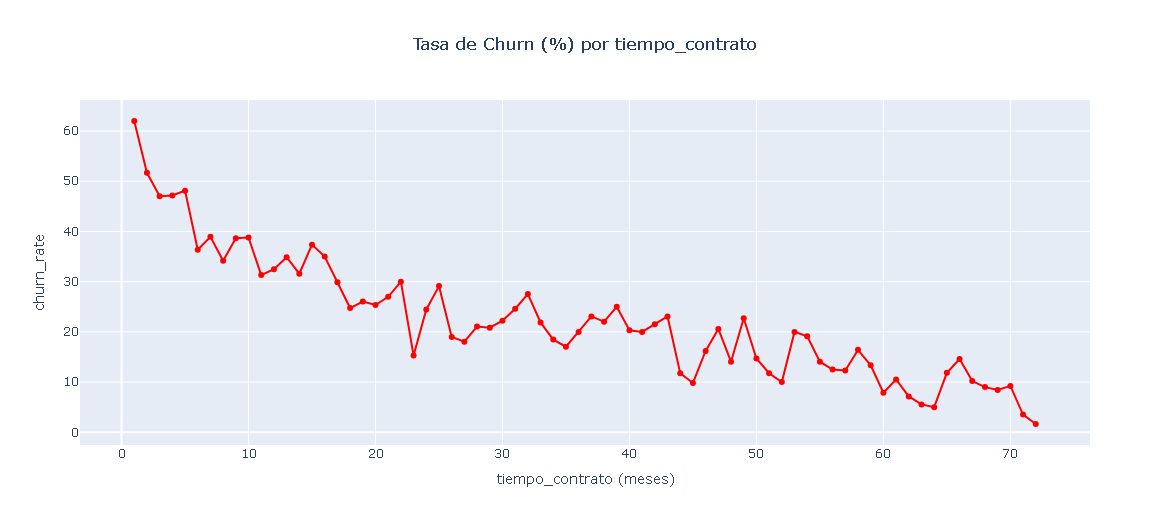

In [40]:
import plotly.express as px

#Preparamos los datos
df_grouped = (
    df.groupby(['tiempo_contrato', 'Churn'])
    .size()
    .reset_index(name='cantidad')
)
df_grouped['Churn_Label'] = df_grouped['Churn'].map({0: '0', 1: '1'})

#Colores
colores_churn = {
    '0': '#1f77b4',
    '1': 'red'
}

#Creación de la gráfica
fig = px.bar(
    df_grouped,
    x='tiempo_contrato',
    y='cantidad',
    color='Churn_Label',
    text='cantidad',
    barmode='group',
    color_discrete_map=colores_churn,
    category_orders={"Churn_Label": ['0', '1']}
)

#Ajustes de trazos
fig.update_traces(
    textposition='outside',
    textangle=-90,
    cliponaxis=False,
    textfont=dict(
        size=22, #Tamaño
        family='Arial', #Fuente
    ),
    hovertemplate="Churn=%{fullData.name}<br>Mes=%{x}<br>Cantidad=%{y}<extra></extra>"
)

#Configuración de ejes y layout
max_y = df_grouped['cantidad'].max()

fig.update_layout(
    title={'text': 'Distribución de evasión de clientes', 'x': 0.5},
    xaxis_title='tiempo_contrato (meses)',
    yaxis_title='Cantidad de clientes',
    yaxis=dict(range=[0, max_y * 1.2], showgrid=True),
    xaxis=dict(tickmode='linear', dtick=5 if df_grouped['tiempo_contrato'].max() > 24 else 1),
    height=600,
    width=1180,
    legend_title_text='',  #Ocultamos el título de la etiqueta
    margin=dict(t=100, b=80, l=60, r=40),
    uniformtext=dict(minsize=6, mode='show'),

    legend=dict(
        x=0.98,
        y=0.98,
        xanchor='right',
        yanchor='top'
    ),
    annotations=[
        dict(
            xref='paper',
            yref='paper',
            x=1.05,
            y=0.98,
            text='Churn',
            showarrow=False,
            font=dict(size=14, color='black'),
            xanchor='left',
            yanchor='top'
        )
    ]
)

fig.show()

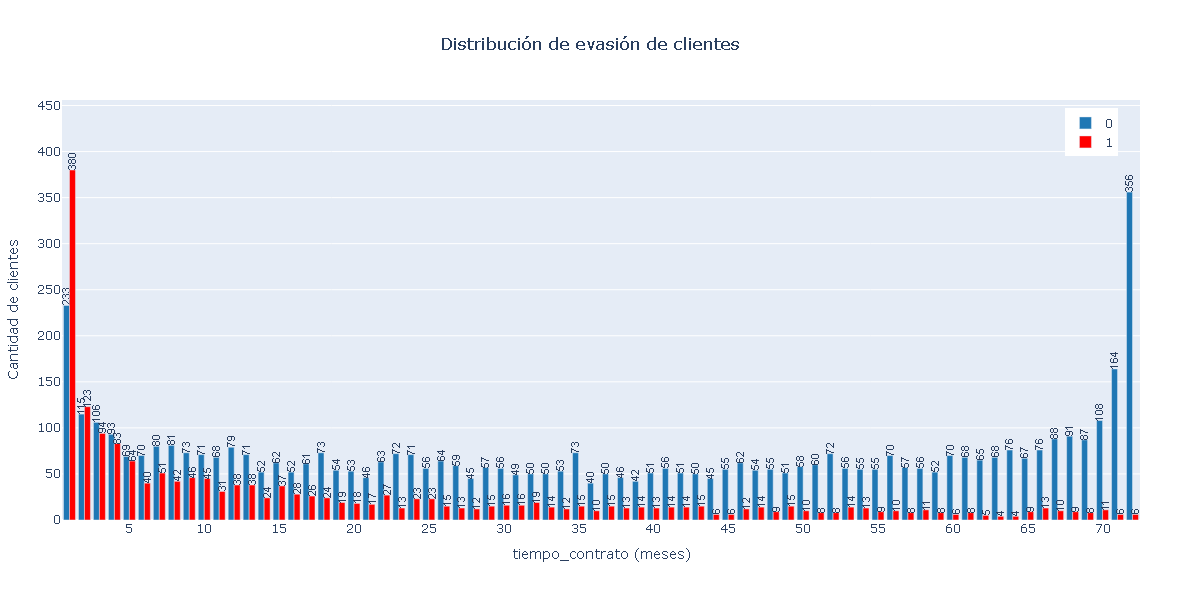

In [41]:
import plotly.express as px

#Preparamos los datos
df_grouped = (
    df.groupby(['tiempo_contrato', 'Churn'])
    .size()
    .reset_index(name='cantidad')
)
df_grouped['Churn_Label'] = df_grouped['Churn'].map({0: '0', 1: '1'})

# Calculate percentages for each Churn label within each tiempo_contrato group
df_grouped['total_por_contrato'] = df_grouped.groupby('tiempo_contrato')['cantidad'].transform('sum')
df_grouped['porcentaje'] = (df_grouped['cantidad'] / df_grouped['total_por_contrato'] * 100).round(1)
df_grouped['texto_porcentaje'] = df_grouped['porcentaje'].astype(str) + '%'

#Colores
colores_churn = {
    '0': '#1f77b4',
    '1': 'red'
}

#Creación de la gráfica
fig = px.bar(
    df_grouped,
    x='tiempo_contrato',
    y='cantidad',
    color='Churn_Label',
    text='texto_porcentaje',
    barmode='group',
    color_discrete_map=colores_churn,
    category_orders={"Churn_Label": ['0', '1']}
)

#Ajustes de trazos
fig.update_traces(
    textposition='outside',
    textangle=-90,
    cliponaxis=False,
    textfont=dict(
        size=10, #Tamaño ajustado para porcentajes
        family='Arial', #Fuente
    ),
    hovertemplate="Churn=%{fullData.name}<br>Mes=%{x}<br>Cantidad=%{y}<br>Porcentaje=%{customdata:.1f}%<extra></extra>",
    customdata=df_grouped['porcentaje']
)

#Configuración de ejes y layout
max_y = df_grouped['cantidad'].max()

fig.update_layout(
    title={'text': 'Distribución de evasión de clientes', 'x': 0.5},
    xaxis_title='tiempo_contrato (meses)',
    yaxis_title='% evasión',
    yaxis=dict(range=[0, max_y * 1.2], showgrid=True),
    xaxis=dict(tickmode='linear', dtick=5 if df_grouped['tiempo_contrato'].max() > 24 else 1),
    height=600,
    width=1180,
    legend_title_text='',  #Ocultamos el título de la etiqueta
    margin=dict(t=100, b=80, l=60, r=40),
    uniformtext=dict(minsize=6, mode='show'),

    legend=dict(
        x=0.98,
        y=0.98,
        xanchor='right',
        yanchor='top'
    ),
    annotations=[
        dict(
            xref='paper',
            yref='paper',
            x=1.05,
            y=0.98,
            text='Churn',
            showarrow=False,
            font=dict(size=14, color='black'),
            xanchor='left',
            yanchor='top'
        )
    ]
)

fig.show()

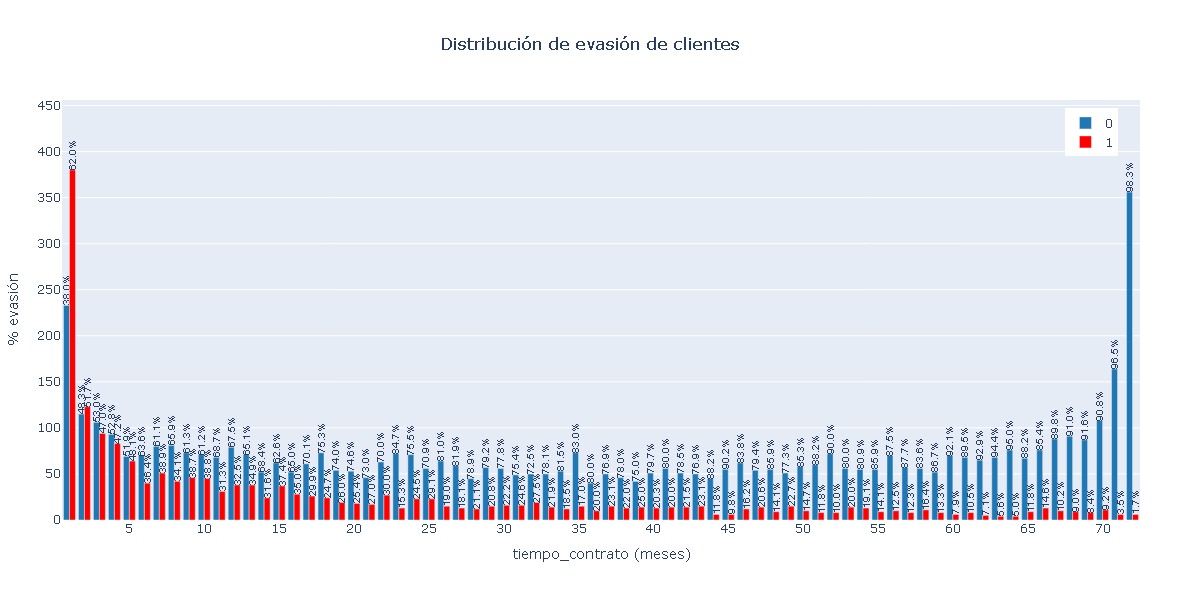

Observación

-Se registra una alta tasa de evasión de clientes en los primeros meses.

In [42]:
import plotly.express as px

#Colores
colores_churn = {
     "0": '#1f77b4',
     "1": 'red'
}

#Creamos el gráfico convirtiendo Churn a string para que sea tratado como categórico
fig = px.scatter(
    df,
    x="tiempo_contrato",
    y="valor_mensual",
    color=df["Churn"].astype(str), #Conversión
    title="tiempo_contrato vs valor_mensual",
    color_discrete_map=colores_churn,
    labels={"color": "Churn"} #Renombramos la leyenda
)

#Ajustamos el diseño
fig.update_layout(
    title_x=0.5,
    xaxis_title="tiempo_contrato (meses)",
    yaxis_title="valor_mensual"
)

fig.show()

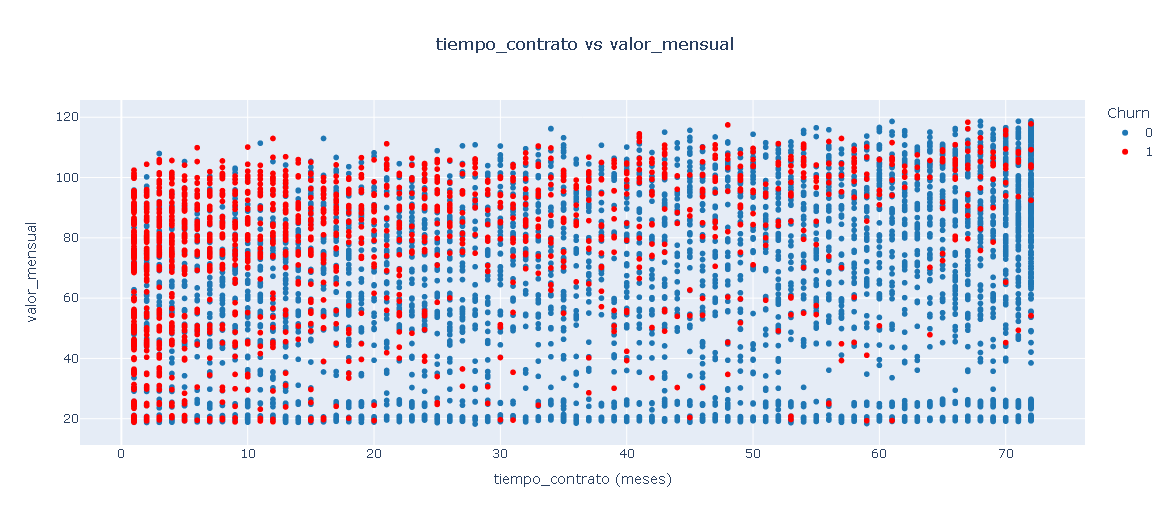

Observación

-Hay una concentración de cancelaciones que se debe al alto valor de la tarifa como lo vemos en la parte superior de la gráfica.

In [43]:
import plotly.express as px
from plotly.subplots import make_subplots

colores_churn = {
     0: '#1f77b4',
     1: 'red'
}

variables_a_plotear = ['tiempo_contrato', 'valor_mensual', 'total_cobrado', 'cuentas_diarias']
subplot_titles = ['Evasión tiempo_contrato', 'Evasión valor_mensual', 'Evasión total_cobrado', 'Evasión cuentas_diarias']

fig = make_subplots(rows=1, cols=4,
                    subplot_titles=subplot_titles,
                    horizontal_spacing=0.08, #Espaciado horizontal.
                    vertical_spacing=0.05) #Espaciado vertical.

seen_legend_items = set() #Para llevar un registro de los elementos de la leyenda ya mostrados.
for i, var in enumerate(variables_a_plotear):
    fig_temp = px.box(df,
                      x = 'Churn',
                      y = var,
                      color = 'Churn',
                      color_discrete_map=colores_churn)

    #Añadir cada trazo de la figura temporal a la subtrama principal.
    for trace in fig_temp.data:
        legend_group_name = trace.name # '0' o '1'.
        trace.showlegend = legend_group_name not in seen_legend_items
        if legend_group_name not in seen_legend_items:
            seen_legend_items.add(legend_group_name)

        fig.add_trace(trace, row=1, col=i+1)

    #Asegurar que las etiquetas y el título del eje y sean visibles para cada subtrama.
    fig.update_yaxes(showticklabels=True, title_text=var, title_standoff=5, automargin=True, row=1, col=i+1)
    fig.update_xaxes(showticklabels=True, title_text='Churn', row=1, col=i+1)

#Ajustar la posición de los títulos de las subtramas.
for annotation in fig.layout.annotations:
    if annotation.yref == 'paper' and annotation.y > 0.95: #Heurística para encontrar los títulos de las subtramas.
        annotation.y = 1.03 #Mover los títulos de las subtramas.

fig.update_layout(title_text='Distribución de evasión por variables numéricas',
                  title_x=0.5,
                  title_y=0.92, #Mover el título principal.
                  height=450, #Altura de la gráfica.
                  margin=dict(l=30, r=60, t=120, b=10), #Ajustar márgenes para el diseño general.
                  width=1134, #Ancho ajustado para 4 columnas.
                  showlegend=True #Asegurar que la visualización general de la leyenda esté activada para los elementos únicos.
                 )

fig.show()

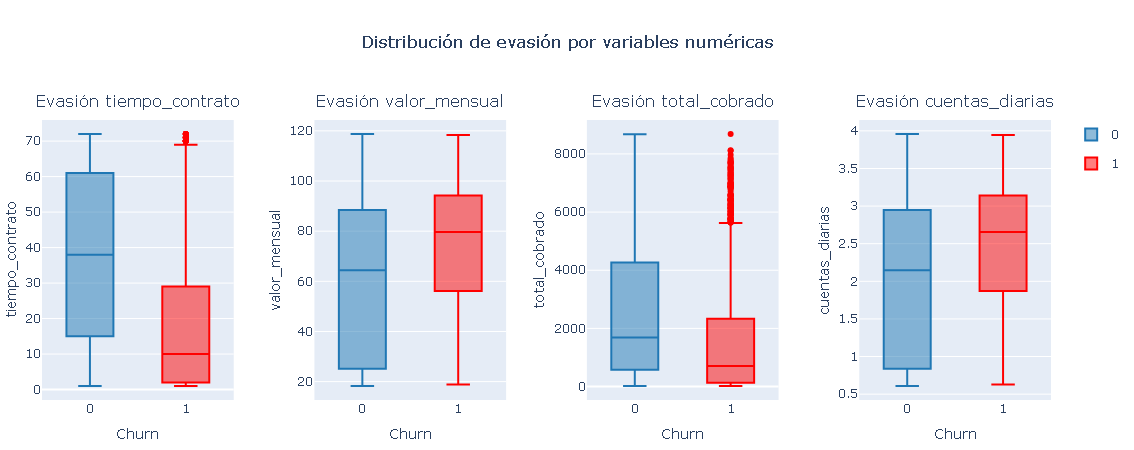

Observaciones

tiempo_contrato: los clientes que cancelan suelen tener un tiempo de contrato mucho más corto.

valor_mensual: los clientes con facturas mensuales más altas son más propensos a cancelar.

total_cobrado: los clientes no han acumulado mucha facturación historica antes de irse.

cuentas_diarias: los clientes con facturas mensuales más altas son más propensos a cancelar.

##Análisis de correlación entre variables

Exploraremos la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:

-La relación entre la cuenta diaria y la evasión.

-Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

Esto puede proporcionar insights valiosos para la creación de modelos predictivos más robustos.

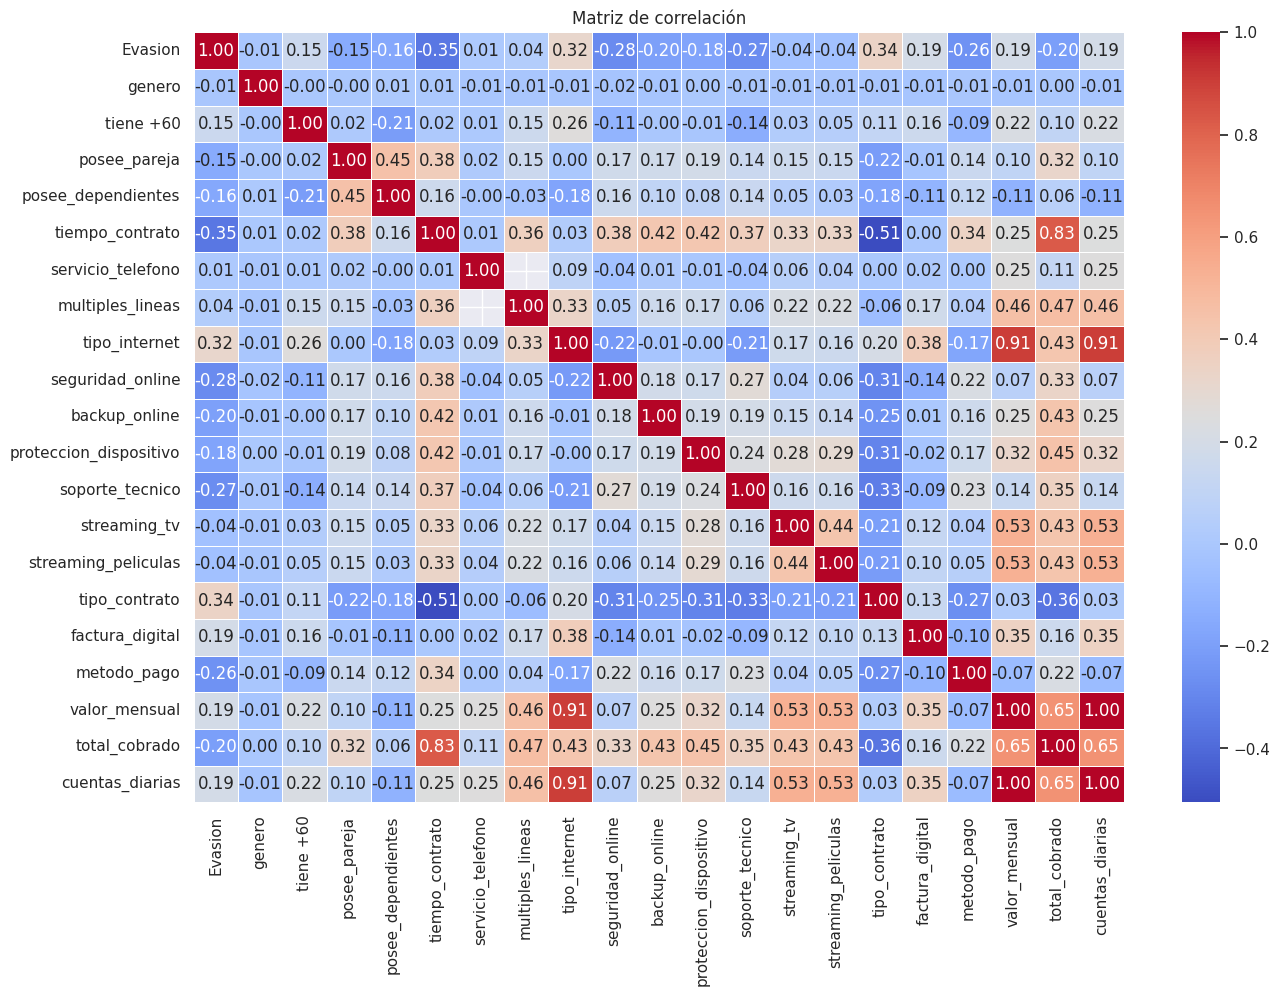

Evasion                   1.00
tipo_contrato             0.34
tipo_internet             0.32
cuentas_diarias           0.19
valor_mensual             0.19
factura_digital           0.19
tiene +60                 0.15
multiples_lineas          0.04
servicio_telefono         0.01
genero                   -0.01
streaming_tv             -0.04
streaming_peliculas      -0.04
posee_pareja             -0.15
posee_dependientes       -0.16
proteccion_dispositivo   -0.18
backup_online            -0.20
total_cobrado            -0.20
metodo_pago              -0.26
soporte_tecnico          -0.27
seguridad_online         -0.28
tiempo_contrato          -0.35


In [44]:
import seaborn as sns

#Seleccionamos las columnas que queremos correlacionar.
#Incluimos las numéricas originales y convertimos las categóricas relevantes.
df_corr = df.copy()

#Convertimos 'Sí'/'No' a 1/0 y otras categorías a números.
#Esto es necesario porque la correlación no puede calcularse sobre texto.
for col in df_corr.select_dtypes(include=['object']).columns:
    if col != 'id': #Ignoramos el ID del cliente
        df_corr[col] = df_corr[col].astype('category').cat.codes

#Cambiamos el nombre 'Churn' a 'Evasion' para mantener la coherencia.
df_corr = df_corr.rename(columns={'Churn': 'Evasion'})

#Calculamos la matriz de correlación.
correlation_matrix = df_corr.drop(columns=['id']).corr()

#Visualizamos con un mapa de Calor (Heatmap).
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

#Imprimir todas las correlaciones con evasion.
print(correlation_matrix['Evasion'].sort_values(ascending=False).round(2).to_string())

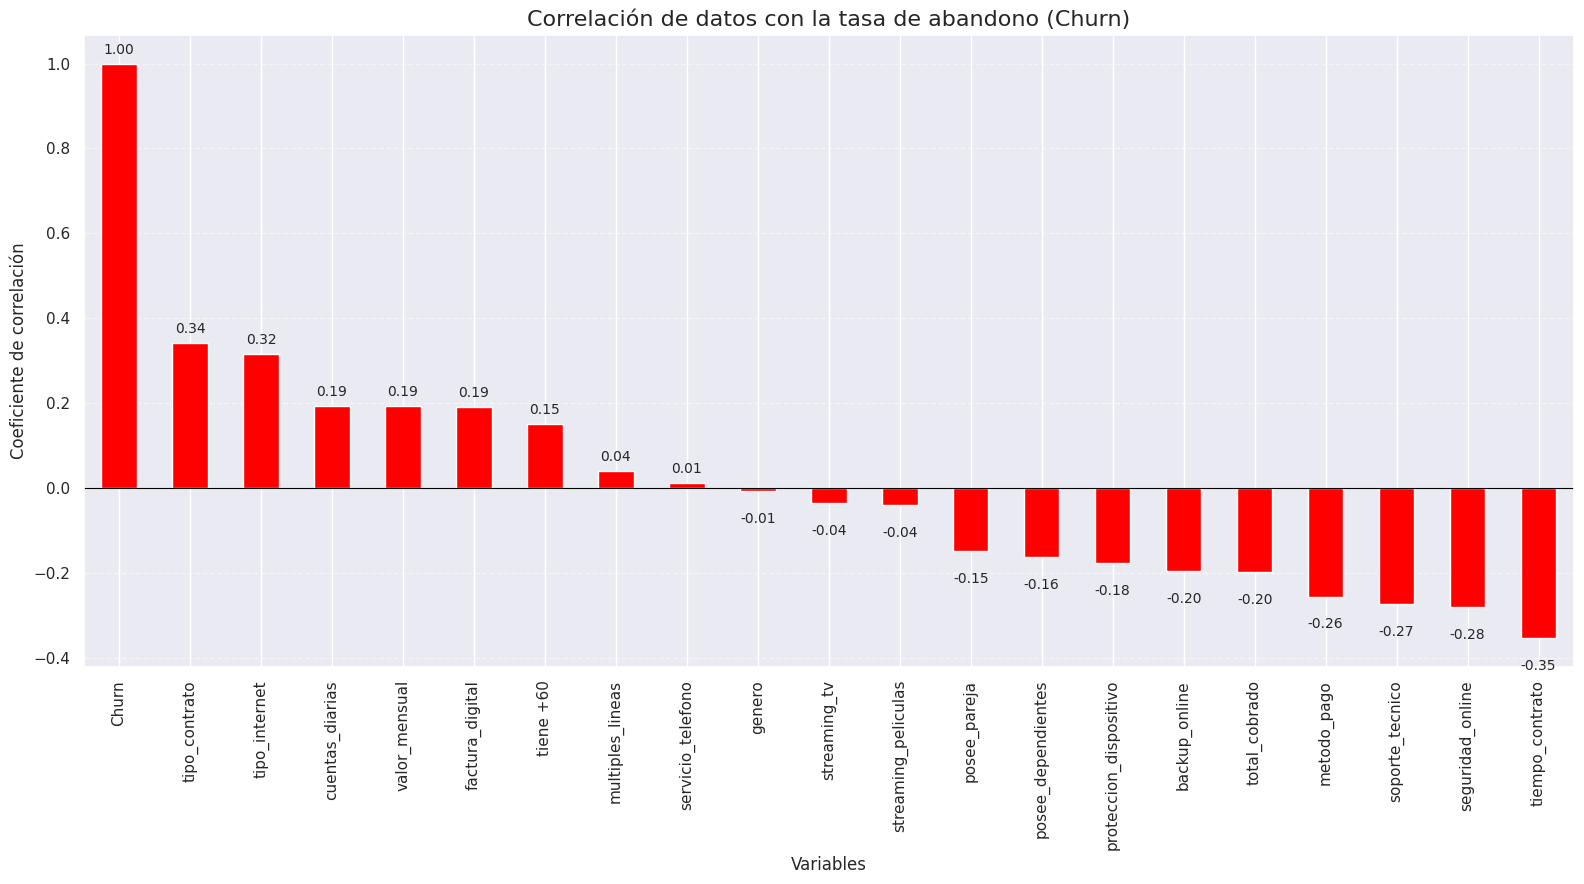

In [45]:
import matplotlib.pyplot as plt

#Preparación de los datos
df_corr_processed = df.copy()
for col in df_corr_processed.select_dtypes(include=['object']).columns:
    if col != 'id':
        df_corr_processed[col] = df_corr_processed[col].astype('category').cat.codes

df_corr_processed = df_corr_processed.drop(columns=['id'])

#Creación del gráfico
plt.figure(figsize=(16, 9))
correlaciones = df_corr_processed.corr()['Churn'].sort_values(ascending=False)
ax = correlaciones.plot(kind='bar', color='red')

#Añadir los valores dinámicamente
for p in ax.patches:
    height = p.get_height()
    #Si el valor es positivo, lo pone arriba. Si es negativo, lo pone abajo.
    va_position = 'bottom' if height > 0 else 'top'
    offset = 5 if height > 0 else -15 #Desplazamiento en puntos

    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va=va_position,
                xytext=(0, offset),
                textcoords='offset points',
                fontsize=10)

#Estética final
plt.title('Correlación de datos con la tasa de abandono (Churn)', fontsize=16)
plt.ylabel('Coeficiente de correlación', fontsize=12)
plt.xlabel('Variables', fontsize=12)
plt.axhline(0, color='black', linewidth=0.8) #Línea en el eje 0 para claridad
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Observaciones

-Vemos que tipo_contrato y tipo_internet tienen una alta tasa de cancelaciones.

-En el tipo de contrato vimos que el contrato mensual tiene un alto registro de cancelaciones.

-En el tipo de internet vimos que el internet de fibra óptica tiene un alto registro de cancelaciones.

-Vemos que en cuentas_diarias y valor_mensual tienen un registro elevado de cancelaciones, esto se debe al alto valor de la tarifa.

#📄 Informe final

##Conclusiones

-La tasa de evasión general es del 26.6%, lo cual es un porcentaje bastante crítico.

-El abandono de clientes se concentra principalmente en los primeros meses de permanencia.

-Los contratos mensuales presentan tasas de abandono significativamente más altas, esto refuerza la impontancia de efectuar estrategias para garantizar sólo contratos a largo plazo, pero no sería conveniente debido a la competencia que hay en el mercado y el cliente tomaría la decisión de efectuar contratos con otra empresa con contratos mensuales y tal vez le garantice un mejor servicio. También hay que ver si el estado permite los contratos a largo plazo. Sería mejor que la empresa efectuara mejores estrategias en el contrato mensual, para que el cliente se sienta satisfecho.

-Los clientes que tienen un contrato a largo plazo, registran una menor tasa de abandono.

-La fibra óptica se identifica como un segmento de alto riesgo cuando no está acompañada de servicios de soporte.

-Los clientes que no usan los servicios de seguridad_online, backup_online y protección_dispositivo, presentan un alto registro de cancelaciones.

-Los medios de pago no automáticos están asociados a una mayor probabilidad de evasión.

-Debido al alto costo de la tarifa hay un alto registro de cancelaciones.

-Los servicios complementarios actúan como barreras en contra de las cancelaciones y mejoran la retención.

##Recomendaciones

-Ofrecer descuentos o beneficios atractivos para motivar a los clientes con contratos mensuales.

-La empresa debe brindar mejor atención con el soporte técnico.

-Se debe mejorar la percepción del servicio de fibra óptica a través de encuestas, mejoras técnicas o campañas de satisfacción.

-Incentivar más el uso de los servicios de seguridad_online, backup_online y protección_dispositivo.

-Promover más los métodos de pago automáticos.

-Orientar las estrategias hacia la buena calidad del servicio.

-Rebajar más la tarifa.